In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Import file

In [2]:
df = pd.read_excel('../data/raw/creditcardmarketing.xlsx')
display(df)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


Explore Data

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

Check for missing values

In [4]:
print(df.isnull().sum())

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64


Check distribution

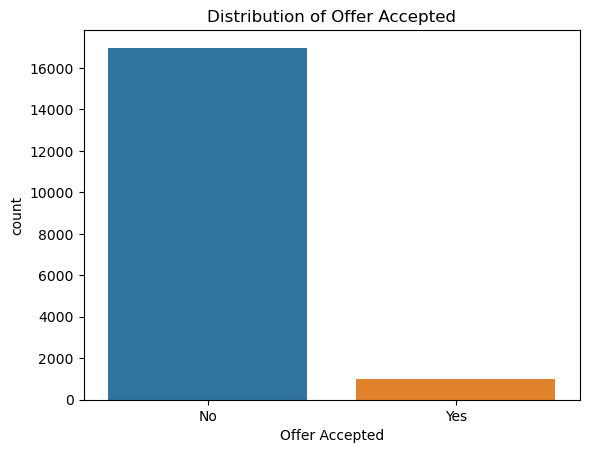

In [5]:
sns.countplot(x='Offer Accepted', data=df)
plt.title('Distribution of Offer Accepted')
plt.show()



Drop

In [6]:
df.dropna()
df.drop(['Customer Number'], axis=1, inplace=True)

Scale

In [8]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Encode

In [9]:
# List of numerical and categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.tolist() + ['Offer Accepted']  

# Create a preprocessing pipeline
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names(categorical_cols))

# Concatenate the encoded DataFrame with the original numerical columns
X_preprocessed = pd.concat([df[numerical_cols], X_encoded_df], axis=1)


C:\Users\Utente\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
print(X_preprocessed)

       # Bank Accounts Open  # Credit Cards Held  # Homes Owned  \
0                 -0.541343             0.121081      -0.476084   
1                 -0.541343             0.121081       1.864032   
2                  1.575115             0.121081      -0.476084   
3                  1.575115            -1.133645      -0.476084   
4                 -0.541343             0.121081      -0.476084   
...                     ...                  ...            ...   
17995             -0.541343            -1.133645      -0.476084   
17996             -0.541343             1.375807      -0.476084   
17997             -0.541343             0.121081      -0.476084   
17998             -0.541343             2.630533       1.864032   
17999              1.575115             0.121081      -0.476084   

       Household Size  Average Balance  Q1 Balance  Q2 Balance  Q3 Balance  \
0            0.449620         0.628724    1.223349   -0.267589    0.095704   
1            1.347164        -2.264609 

Save in new file

In [11]:
file_path = 'creditcardmarketing_processed.xlsx'  
X_preprocessed.to_excel(file_path, index=False)  


In [ ]:
display(df)